Linear programming


(-5, 30)

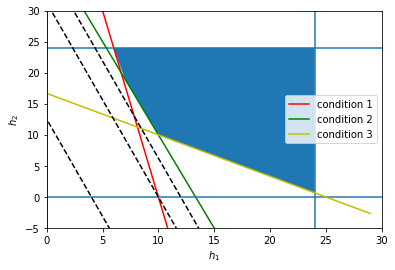

In [11]:
import matplotlib.pyplot as pl
import numpy as np
h1=np.arange(-2.,30.)
# definimos espacio de parametros posibles
#constraint 1  -2x1+x2< 2
c1=(600-h1*60)/10
fig, ax = pl.subplots()
pl.plot(h1,c1,'r',label='condition 1')
#constraint 2  x1 < 3
pl.axvline(x=24)
pl.axhline(y=24)
#constraint 3  -x1+x2<=3
c3=(400-30*h1)/10
pl.plot(h1,c3,'g',label='condition 2')
#contraint  4   x1,x2>0
pl.axhline(y=0)
pl.axvline(x=0)
c4=(1000-40*h1)/60
pl.plot(h1,c4,'y',label='condition 3')
#pl.ylim(-1,7)
pl.xlabel(r'$h_1$')
pl.ylabel(r'$h_2$')

h1=np.arange(6.,25.)
c3=(400.-30*h1)/10
c1=(600.-h1*60)/10
c4=(1000.-40*h1)/60
#c3=3+x1
#c1=(2*x1+2)
c5=h1*0+12
y4 = np.maximum(c1, c3)
y5 = np.maximum(c4, y4)
#y6 = np.maximum(y5, h1*0+24)

ax.fill_between(h1,y5,24)
pl.legend()
h1=np.arange(-2.,30.)
# objective 1.80*h1+1.6*h2
pl.plot(h1,(60-5.*h1)/1.6,'k--')
pl.plot(h1,(50-5.*h1)/1.6,'k--')
pl.plot(h1,(20-5.*h1)/1.6,'k--')

pl.xlim(0,30)
pl.ylim(-5,30)



In [3]:
from scipy.optimize import linprog
help(linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form::
    
        Minimize:     c^T * x
    
        Subject to:   A_ub * x <= b_ub
                      A_eq * x == b_eq
    
    Parameters
    ----------
    c : array_like
        Coefficients of the linear objective function to be minimized.
    A_ub : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, gives the values of
        the upper-bound inequality constraints at ``x``.
    b_ub : array_like, optional
        1-D array of values representing the upper-bound of each inequality
        constraint (row) in ``A_ub``.
    A_eq : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, 

In [4]:
c=[20,6]  # ponemos coeficientes de función objetivo
A_ub=[[-60,-10],[-30,-10],[-40,-60]]         # ponemos equaciones en forma de matriz. Fila 1, coeficientes eq 1
               #                                        Fila 2, coeficientes eq 2 ...
b_ub=[-600,-400,-1000]        # Fila 1 resultado inecuacion 1
               # Fila 2 resultado inecuación 2
# A_eq,b_eq    lo mismo para igualdades, en este caso no hay
bounds=(0,24)      # valores maximos y minimos que toma cada variable. Si son distintos [(0,24),(0,12)]

In [5]:
res=linprog(c,A_ub=A_ub,b_ub=b_ub,bounds=bounds)

Resolvemos con python. 
Resolvemos con "trust-constr" que poner las ecuaciones en un objeto 
LinearConstraint(A, lb, ub)  donde lb <= A.dot(x) <= ub. A tiene dimension num variables = 2 x numero de inequaciones en este caso 2, el resto vendrá definido en bounds

In [6]:
res.x,res.fun

(array([ 6.66666667, 20.        ]), 253.33333333333334)

In [12]:
def func(x):
    return -2*x[0]*x[1]+x[1]**2
def jac(x):
    return [-2*x[1],2*x[1]]

In [13]:
import scipy.optimize as opt
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
def func(x):
    return -2*x[0]*x[1]+x[1]**2
def Jac(x):
    return [-2*x[1],2*x[1]]
#bounds=Bounds([0,0],[3,np.inf])
#lb=[-np.inf,-np.inf]
#ub=[2,3]
#A=[[-2,1],[-1,1]]
bounds=Bounds([0,0],[24,24])
lb=[-np.inf,-np.inf]
ub=[2,3]
A=[[-2,1],[-1,1]]
LinCons=LinearConstraint(A,lb,ub)

res = opt.minimize(func, [0,0], method='trust-constr', jac=Jac,hess='3-point',constraints=LinCons,options={'verbose': 1}, bounds=bounds)

`xtol` termination condition is satisfied.
Number of iterations: 343, function evaluations: 355, CG iterations: 333, optimality: 1.46e+01, constraint violation: 0.00e+00, execution time: 0.55 s.


In [14]:
print res


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 333
      cg_stop_cond: 2
            constr: [array([-27.79845755, -10.11764519]), array([17.68081236,  7.56316718])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.554049015045166
               fun: -210.2443817313117
              grad: array([-15.12633435,  15.12633435])
               jac: [array([[-2,  1],
       [-1,  1]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-14.45139624,  14.59925247])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 355
              nhev: 0
             niter: 343
              njev: 2013
        optimality: 14.599252465157075
            status: 2
         tr_radius: 7.450580596923828e-09
                 v: [array([-0.04899165, -0.16882784]), array([

In [15]:
print 'PUNTO función es mínima',np.round(res.x,2),'valor Función',np.round(res.fun)

PUNTO función es mínima [17.68  7.56] valor Función -210.0


In [ ]:
# si tenemos equacion no-Lineal  con las mismas inequaciones, lo mismo, tenemos que recalcular el gradiente
